# Title

To Cover:
- blah
- blah
- blah

In [ ]:
# this makes every line of a cell print instead of just the last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import sympy
from sympy import KroneckerProduct
from sympy.combinatorics import Permutation
from sympy.concrete.summations import Sum
from sympy.core.numbers import Rational
from sympy.core.singleton import S
from sympy.core.symbol import symbols
from sympy.functions.elementary.exponential import (exp, log)
from sympy.functions.elementary.miscellaneous import sqrt
from sympy.functions.elementary.trigonometric import (cos, sin, tan)
from sympy.functions.special.tensor_functions import KroneckerDelta
from sympy.matrices.expressions.determinant import Determinant
from sympy.matrices.expressions.diagonal import DiagMatrix
from sympy.matrices.expressions.hadamard import (HadamardPower, HadamardProduct, hadamard_product)
from sympy.matrices.expressions.inverse import Inverse
from sympy.matrices.expressions.matexpr import MatrixSymbol
from sympy.matrices.expressions.special import OneMatrix
from sympy.matrices.expressions.trace import Trace
from sympy.matrices.expressions.matadd import MatAdd
from sympy.matrices.expressions.matmul import MatMul
from sympy.matrices.expressions.special import (Identity, ZeroMatrix)
from sympy.tensor.array.array_derivatives import ArrayDerivative
from sympy.matrices.expressions import hadamard_power
from sympy.tensor.array.expressions.array_expressions import ArrayAdd, ArrayTensorProduct, PermuteDims

i, j, k = symbols("i j k")

X = MatrixSymbol("X", k, k)
x = MatrixSymbol("x", k, 1)
y = MatrixSymbol("y", k, 1)

A = MatrixSymbol("A", k, k)
B = MatrixSymbol("B", k, k)
C = MatrixSymbol("C", k, k)
D = MatrixSymbol("D", k, k)

a = MatrixSymbol("a", k, 1)
b = MatrixSymbol("b", k, 1)
c = MatrixSymbol("c", k, 1)
d = MatrixSymbol("d", k, 1)

In [ ]:
I = Identity(k)
AdA = PermuteDims(ArrayTensorProduct(I, I), Permutation(3)(1, 2))
A.diff(A) == AdA
A.T.diff(A) == PermuteDims(ArrayTensorProduct(I, I), Permutation(3)(1, 2, 3))
(2*A).diff(A) == PermuteDims(ArrayTensorProduct(2*I, I), Permutation(3)(1, 2))
MatAdd(A, A).diff(A) == ArrayAdd(AdA, AdA)
(A + B).diff(A) == AdA

In [ ]:
((A * X + B).T * (A * X + B)).diff(X)

In [31]:
sigma = 1 / (1 + sympy.exp(-k))
sigma.diff(k)

exp(-k)/(1 + exp(-k))**2

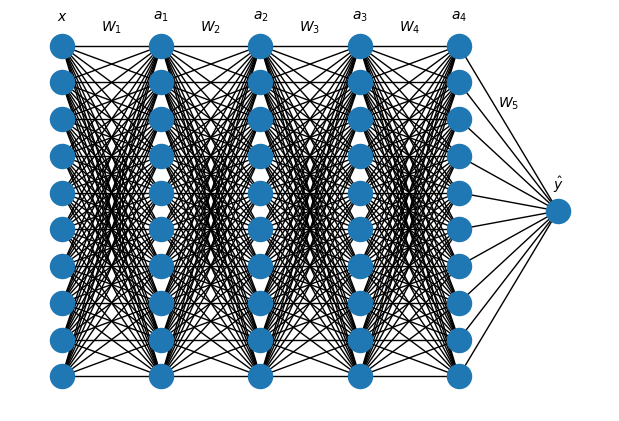

In [115]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_network(neurons_per_layer, layer_names=None, edge_names=None, layer_offset=0.5, edge_offset=0.5):
    G = nx.Graph()
    plt.figure(figsize=(6,4))
    # add nodes
    for i, n in enumerate(neurons_per_layer):
        for j in range(n):
            G.add_node(f"{i}_{j}", pos=(i, j - (n-1)/2))

    # add edges
    for i, n in enumerate(neurons_per_layer[:-1]):
        for j in range(n):
            for k in range(neurons_per_layer[i+1]):
                G.add_edge(f"{i}_{j}", f"{i+1}_{k}")

    # draw network
    pos = nx.get_node_attributes(G, "pos")
    nx.draw(G, pos, with_labels=False)

    # add label names
    if layer_names is not None:
        for i, name in enumerate(layer_names):
            y_offset = neurons_per_layer[i] / 5 
            y_offset += layer_offset * y_offset
            if neurons_per_layer[i] < 3:
                y_offset += 0.2
            plt.text(i, y_offset, name, ha="center", va="center")

    # add edge names
    if edge_names is not None:
        for i, name in enumerate(edge_names):
            x_offset = i + 0.5
            y_offset = (neurons_per_layer[i] + neurons_per_layer[i+1]) / 5 
            y_offset += edge_offset * y_offset
            if min(neurons_per_layer[i], neurons_per_layer[i+1]) < 3:
                y_offset += 0.2
            plt.text(x_offset, y_offset, name, ha="center", va="center")
    plt.show()

layers = [10] * 5 + [1]
layer_names = ['$x$'] + [f'$a_{i+1}$' for i in range(len(layers[1:-1]))] + ['$\hat y$']
edge_names = [f'$W_{i+1}$' for i in range(len(layers[:-1]))]
draw_neural_network(layers, layer_names=layer_names, edge_names=edge_names, layer_offset=1.65, edge_offset=0.25)